In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

from data import ProbingDataset

In [8]:
ds = ProbingDataset()
loader = torch.utils.data.DataLoader(ds, batch_size=64, num_workers=0, pin_memory=True)

In [9]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc = nn.Linear(512, 3*8*8, bias=True)

    def forward(self, x):
        # x : (B, 512)

        # y : (B, 3*8*8)

        return self.fc(x)

In [10]:
probe = MLP()
optim = torch.optim.AdamW(probe.parameters(), lr=1e-4)

/home/alex/miniconda3/envs/torch23/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
losses = []

In [12]:
for i, data in enumerate(loader):
    activations, boards = data
    boards = boards.long()

    logits = probe(activations)

    loss = F.cross_entropy(logits.view(-1, 3), boards.view(-1))

    optim.zero_grad()
    loss.backward()
    optim.step()

    losses.append(loss.item())

    if i >= 1000:
        break

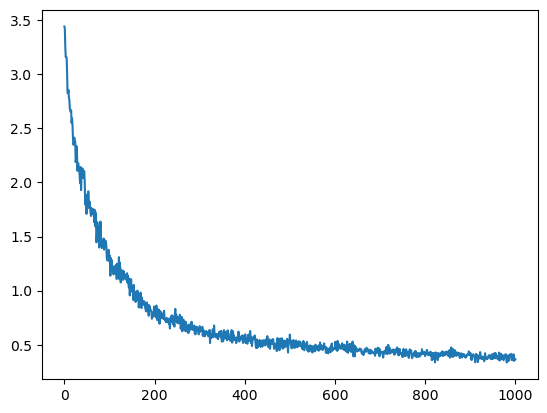

In [13]:
plt.plot(losses)

In [17]:
activations, boards = next(iter(loader))

In [18]:
boards[0].view(8, 8)

tensor([[1, 0, 2, 2, 2, 0, 0, 0],
        [1, 1, 1, 2, 2, 2, 1, 0],
        [1, 1, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 2, 2, 2, 0],
        [1, 0, 1, 2, 1, 2, 0, 0],
        [2, 2, 2, 1, 2, 2, 2, 2],
        [2, 2, 1, 1, 1, 0, 2, 0],
        [0, 1, 1, 1, 1, 0, 0, 2]], dtype=torch.int32)

In [19]:
torch.argmax(probe(activations)[0].view(64, 3), dim=1).view(8, 8)

tensor([[2, 0, 2, 1, 2, 0, 0, 0],
        [1, 2, 2, 1, 1, 2, 1, 0],
        [1, 1, 2, 1, 1, 1, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 0],
        [1, 0, 2, 1, 2, 2, 0, 0],
        [2, 2, 2, 1, 2, 2, 2, 2],
        [2, 2, 1, 1, 2, 0, 2, 0],
        [0, 1, 1, 1, 1, 0, 0, 2]])